In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
rf=pd.read_csv("company_data.csv")
rf.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
rf.shape

(400, 11)

In [4]:
rf.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
rf.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
rf.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
rf.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
170,8.01,128,39,12,356,118,Medium,71,10,Yes,Yes
38,6.59,109,73,0,454,102,Medium,65,15,Yes,No
321,7.52,123,39,5,499,98,Medium,34,15,Yes,No
49,10.61,157,93,0,51,149,Good,32,17,Yes,No
103,5.07,123,91,0,334,96,Bad,78,17,Yes,Yes


# PAIR PLOT

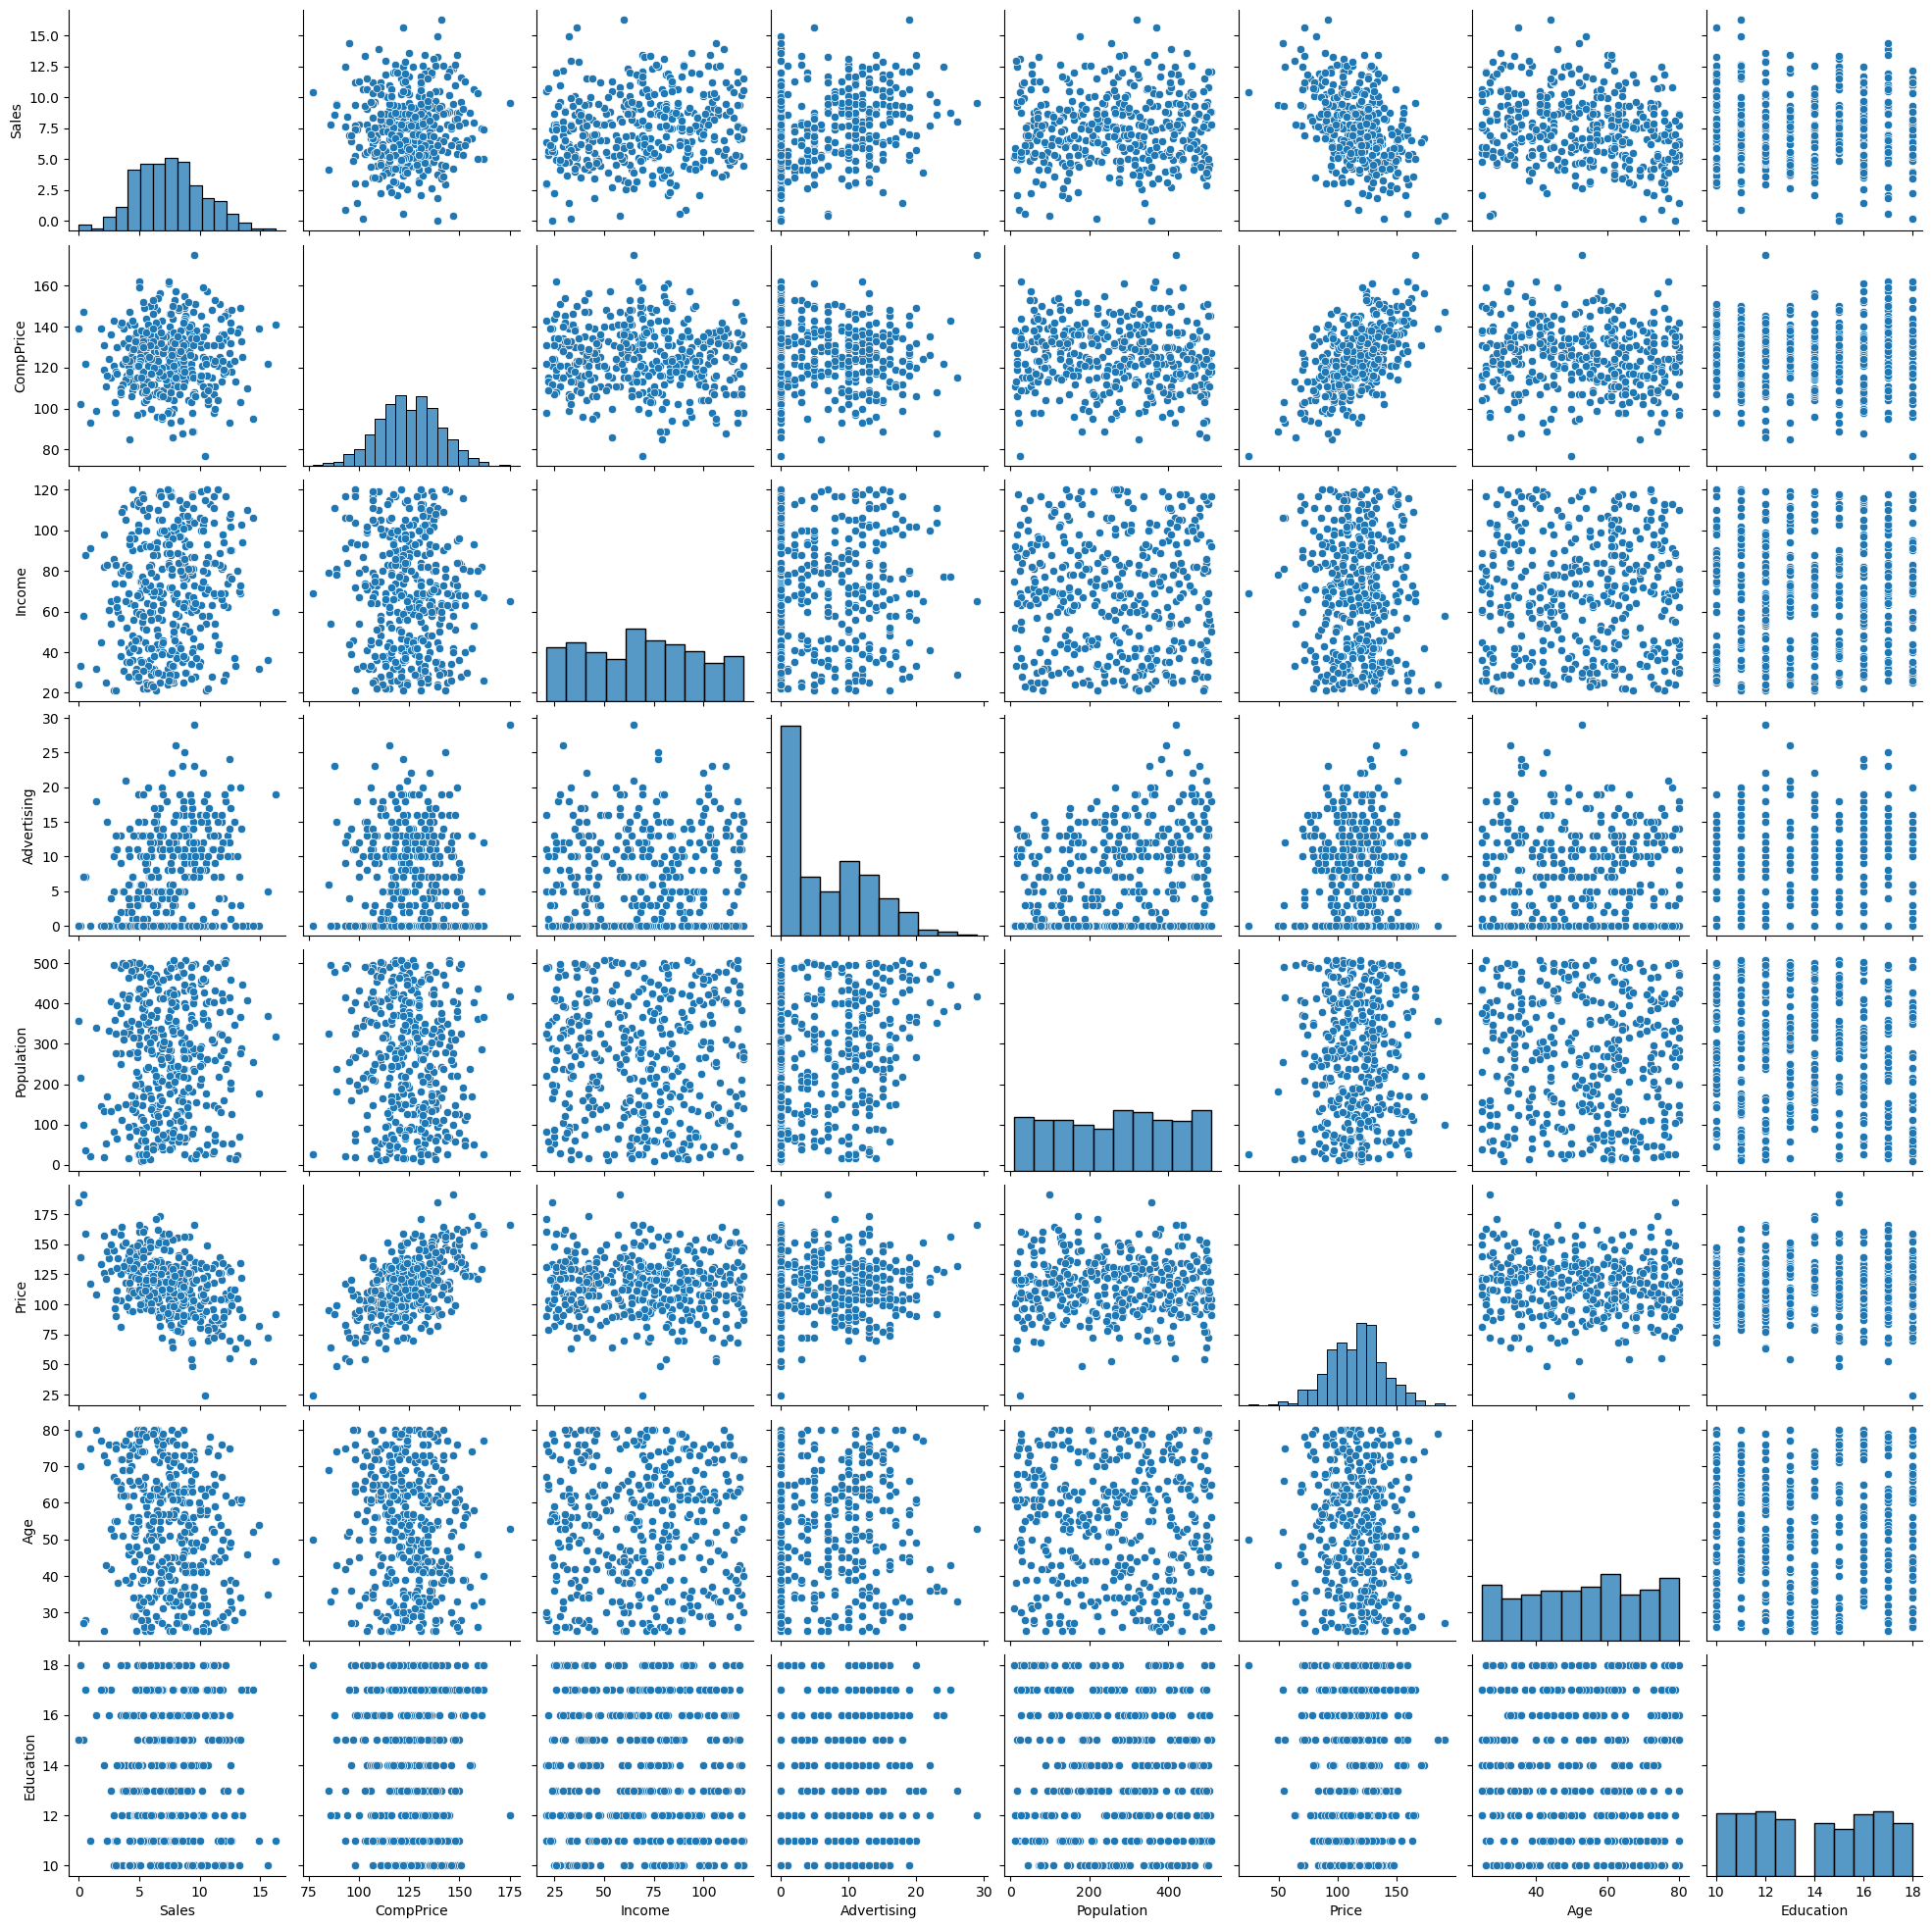

In [9]:
import seaborn as sns
sns.pairplot(rf)

# DATA PREPROCESSING

In [10]:
rf['ShelveLoc'].unique(),rf['US'].unique(),rf['Urban'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [11]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [12]:
rf['ShelveLoc']=lr.fit_transform(rf['ShelveLoc'])
rf['Urban']=lr.fit_transform(rf['Urban'])
rf['US']=lr.fit_transform(rf['US'])

In [13]:
rf

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# Converting SALES column into Categorical 

In [14]:
rf.insert(11,"SV",'')

In [15]:
rf.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SV
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,


In [16]:
for i in range(0,len(rf['Sales'])):
    if rf['Sales'][i]>=11.0:
        rf['SV'][i]='high'
    elif rf['Sales'][i]<=6.0:
        rf['SV'][i]='Low'
    else:
        rf['SV'][i]='Medium'

In [17]:
rf

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SV
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


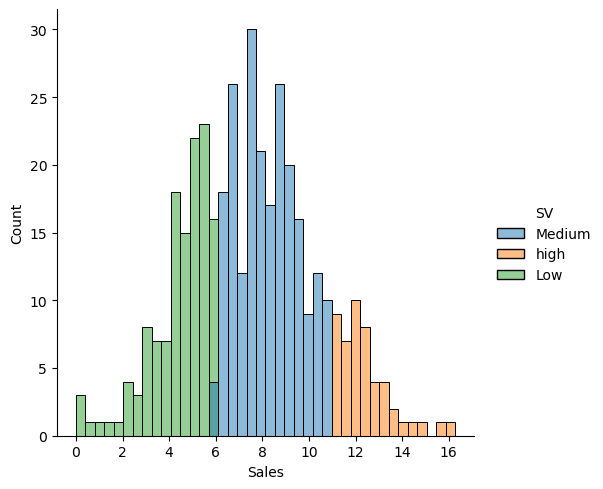

In [18]:
sns.displot(x="Sales",data=rf,hue="SV",bins=40)
plt.show()

# MODEL BUILDING

In [19]:
x=rf.iloc[:,1:-1]
y=rf["SV"]

In [20]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [21]:
y

0      Medium
1        high
2      Medium
3      Medium
4         Low
        ...  
395      high
396    Medium
397    Medium
398       Low
399    Medium
Name: SV, Length: 400, dtype: object

# Split the data into train and test data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [23]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
24,145,119,16,294,113,0,42,12,1,1
33,114,38,13,317,128,1,50,16,1,1
396,139,23,3,37,120,2,55,11,0,1
273,116,106,8,244,86,2,58,12,1,1
246,120,56,20,266,90,0,78,18,1,1
...,...,...,...,...,...,...,...,...,...,...
73,118,90,10,54,104,1,31,11,0,1
118,112,88,2,243,99,2,62,11,1,1
189,118,117,18,509,104,2,26,15,0,1
206,162,67,0,27,160,2,77,17,1,1


In [24]:
y_train

24     Medium
33     Medium
396    Medium
273    Medium
246    Medium
        ...  
73       high
118    Medium
189      high
206       Low
355    Medium
Name: SV, Length: 300, dtype: object

In [25]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
218,138,61,12,156,120,2,25,14,1,1
191,156,42,13,170,173,1,74,14,1,1
117,145,53,0,507,119,2,41,12,1,0
50,99,32,18,341,108,0,80,16,1,1
348,132,102,20,459,107,1,49,11,1,1
...,...,...,...,...,...,...,...,...,...,...
368,109,22,10,348,79,1,74,14,0,1
89,128,66,3,493,119,2,45,16,0,0
182,137,60,4,230,140,0,25,13,1,0
219,116,79,19,359,116,1,58,17,1,1


In [26]:
y_test

218    Medium
191    Medium
117    Medium
50        Low
348      high
        ...  
368    Medium
89     Medium
182       Low
219    Medium
18       high
Name: SV, Length: 100, dtype: object

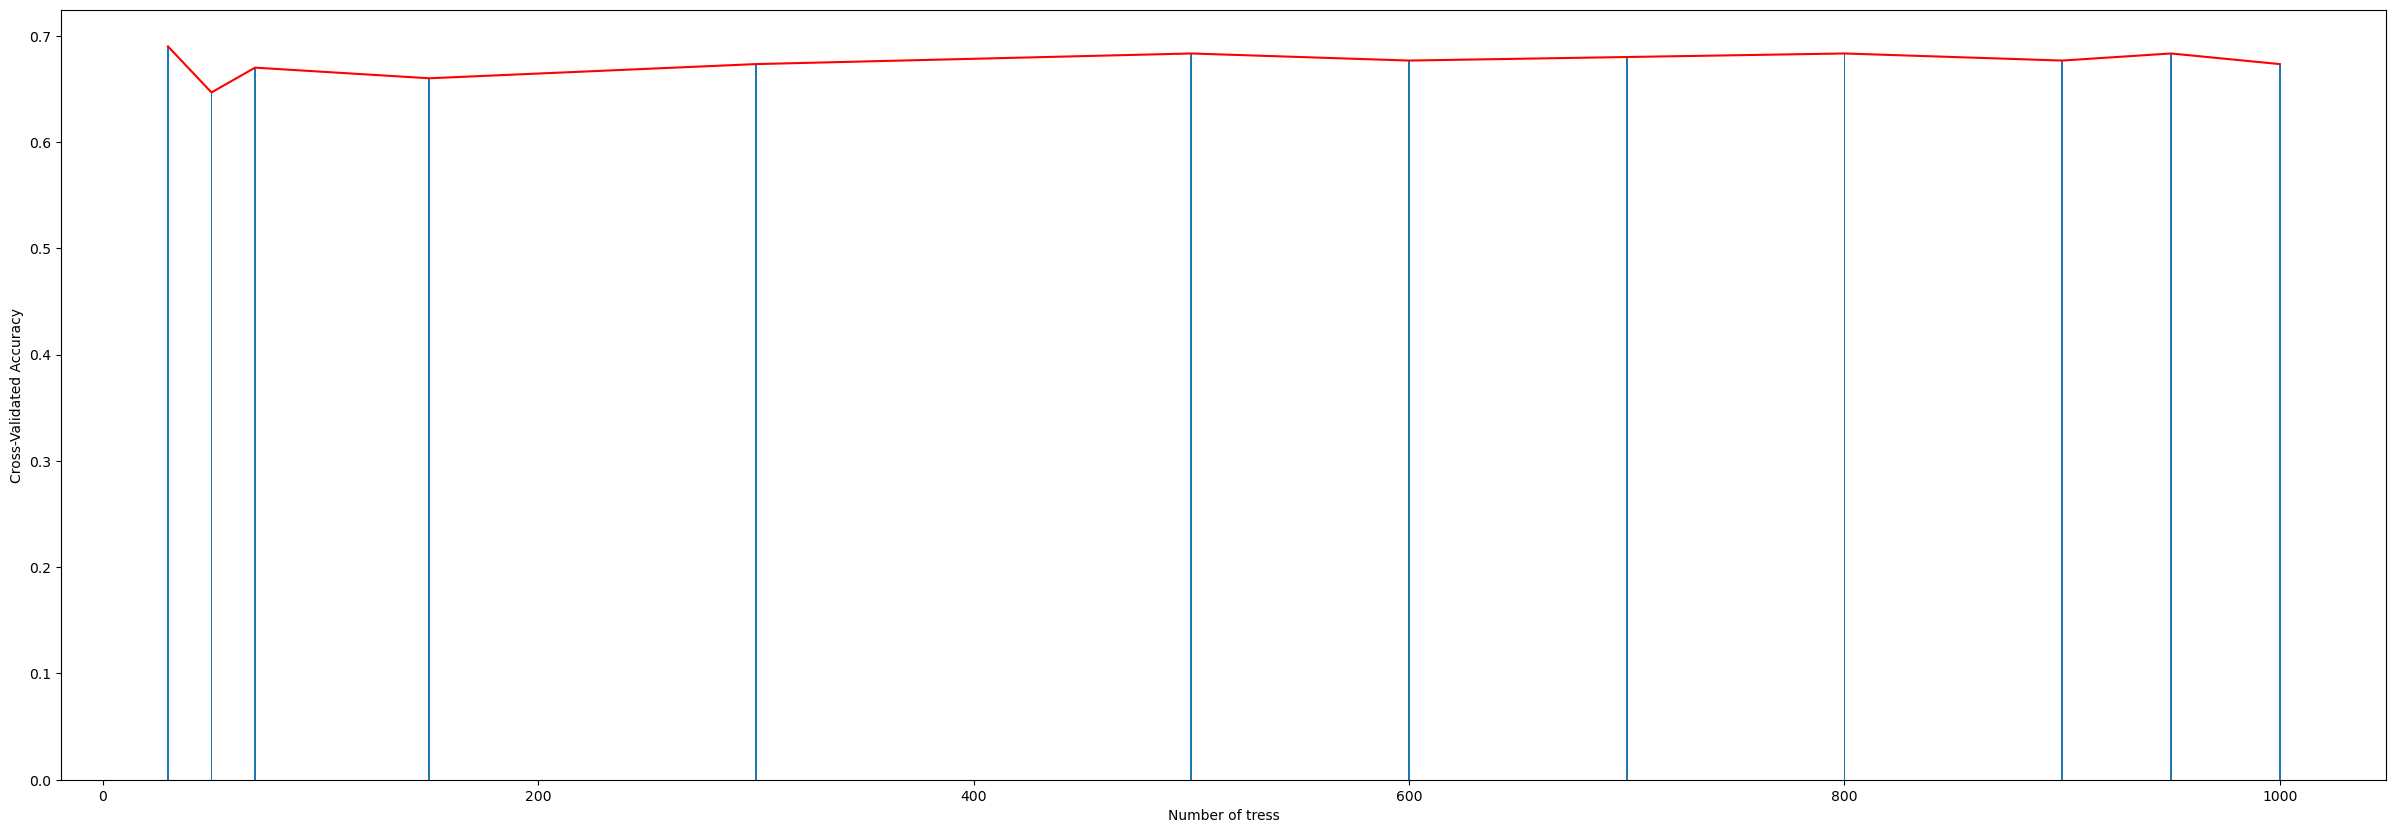

In [36]:
%matplotlib inline
num_trees = [30,50,70,150,300,500,600,700,800,900,950,1000]
nf=[2,3,4,5,6]
k_scores = []

for k in num_trees:

    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, x_train, y_train, cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="red")

plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Grid search CV to find best Hyperparameter

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
new=RandomForestClassifier()
parameters={
    "n_estimators":[100,120,140,160],
    "max_features":[3,5,7,9]
}

In [29]:
grid=GridSearchCV(new,parameters,cv=20)

In [30]:
grid.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_features': [3, 5, 7, 9],
                         'n_estimators': [100, 120, 140, 160]})

In [31]:
grid.best_score_

0.7033333333333333

In [32]:
grid.best_params_

{'max_features': 3, 'n_estimators': 140}

In [33]:
model=RandomForestClassifier(max_features=5,n_estimators=120)

In [34]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=120)

In [35]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

         Low       0.66      0.79      0.72        29
      Medium       0.76      0.80      0.78        60
        high       1.00      0.18      0.31        11

    accuracy                           0.73       100
   macro avg       0.81      0.59      0.60       100
weighted avg       0.76      0.73      0.71       100



# TREE ESTIMATORS WITH GINI INDEX

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=4)

In [41]:
preds=grid.predict(x_test)
pd.Series(preds).value_counts()

Medium    66
Low       34
dtype: int64

In [42]:
metrics.accuracy_score(preds,y_test)

0.66

In [43]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         Low       0.59      0.69      0.63        29
      Medium       0.70      0.77      0.73        60
        high       0.00      0.00      0.00        11

    accuracy                           0.66       100
   macro avg       0.43      0.49      0.46       100
weighted avg       0.59      0.66      0.62       100



In [44]:
from sklearn import tree

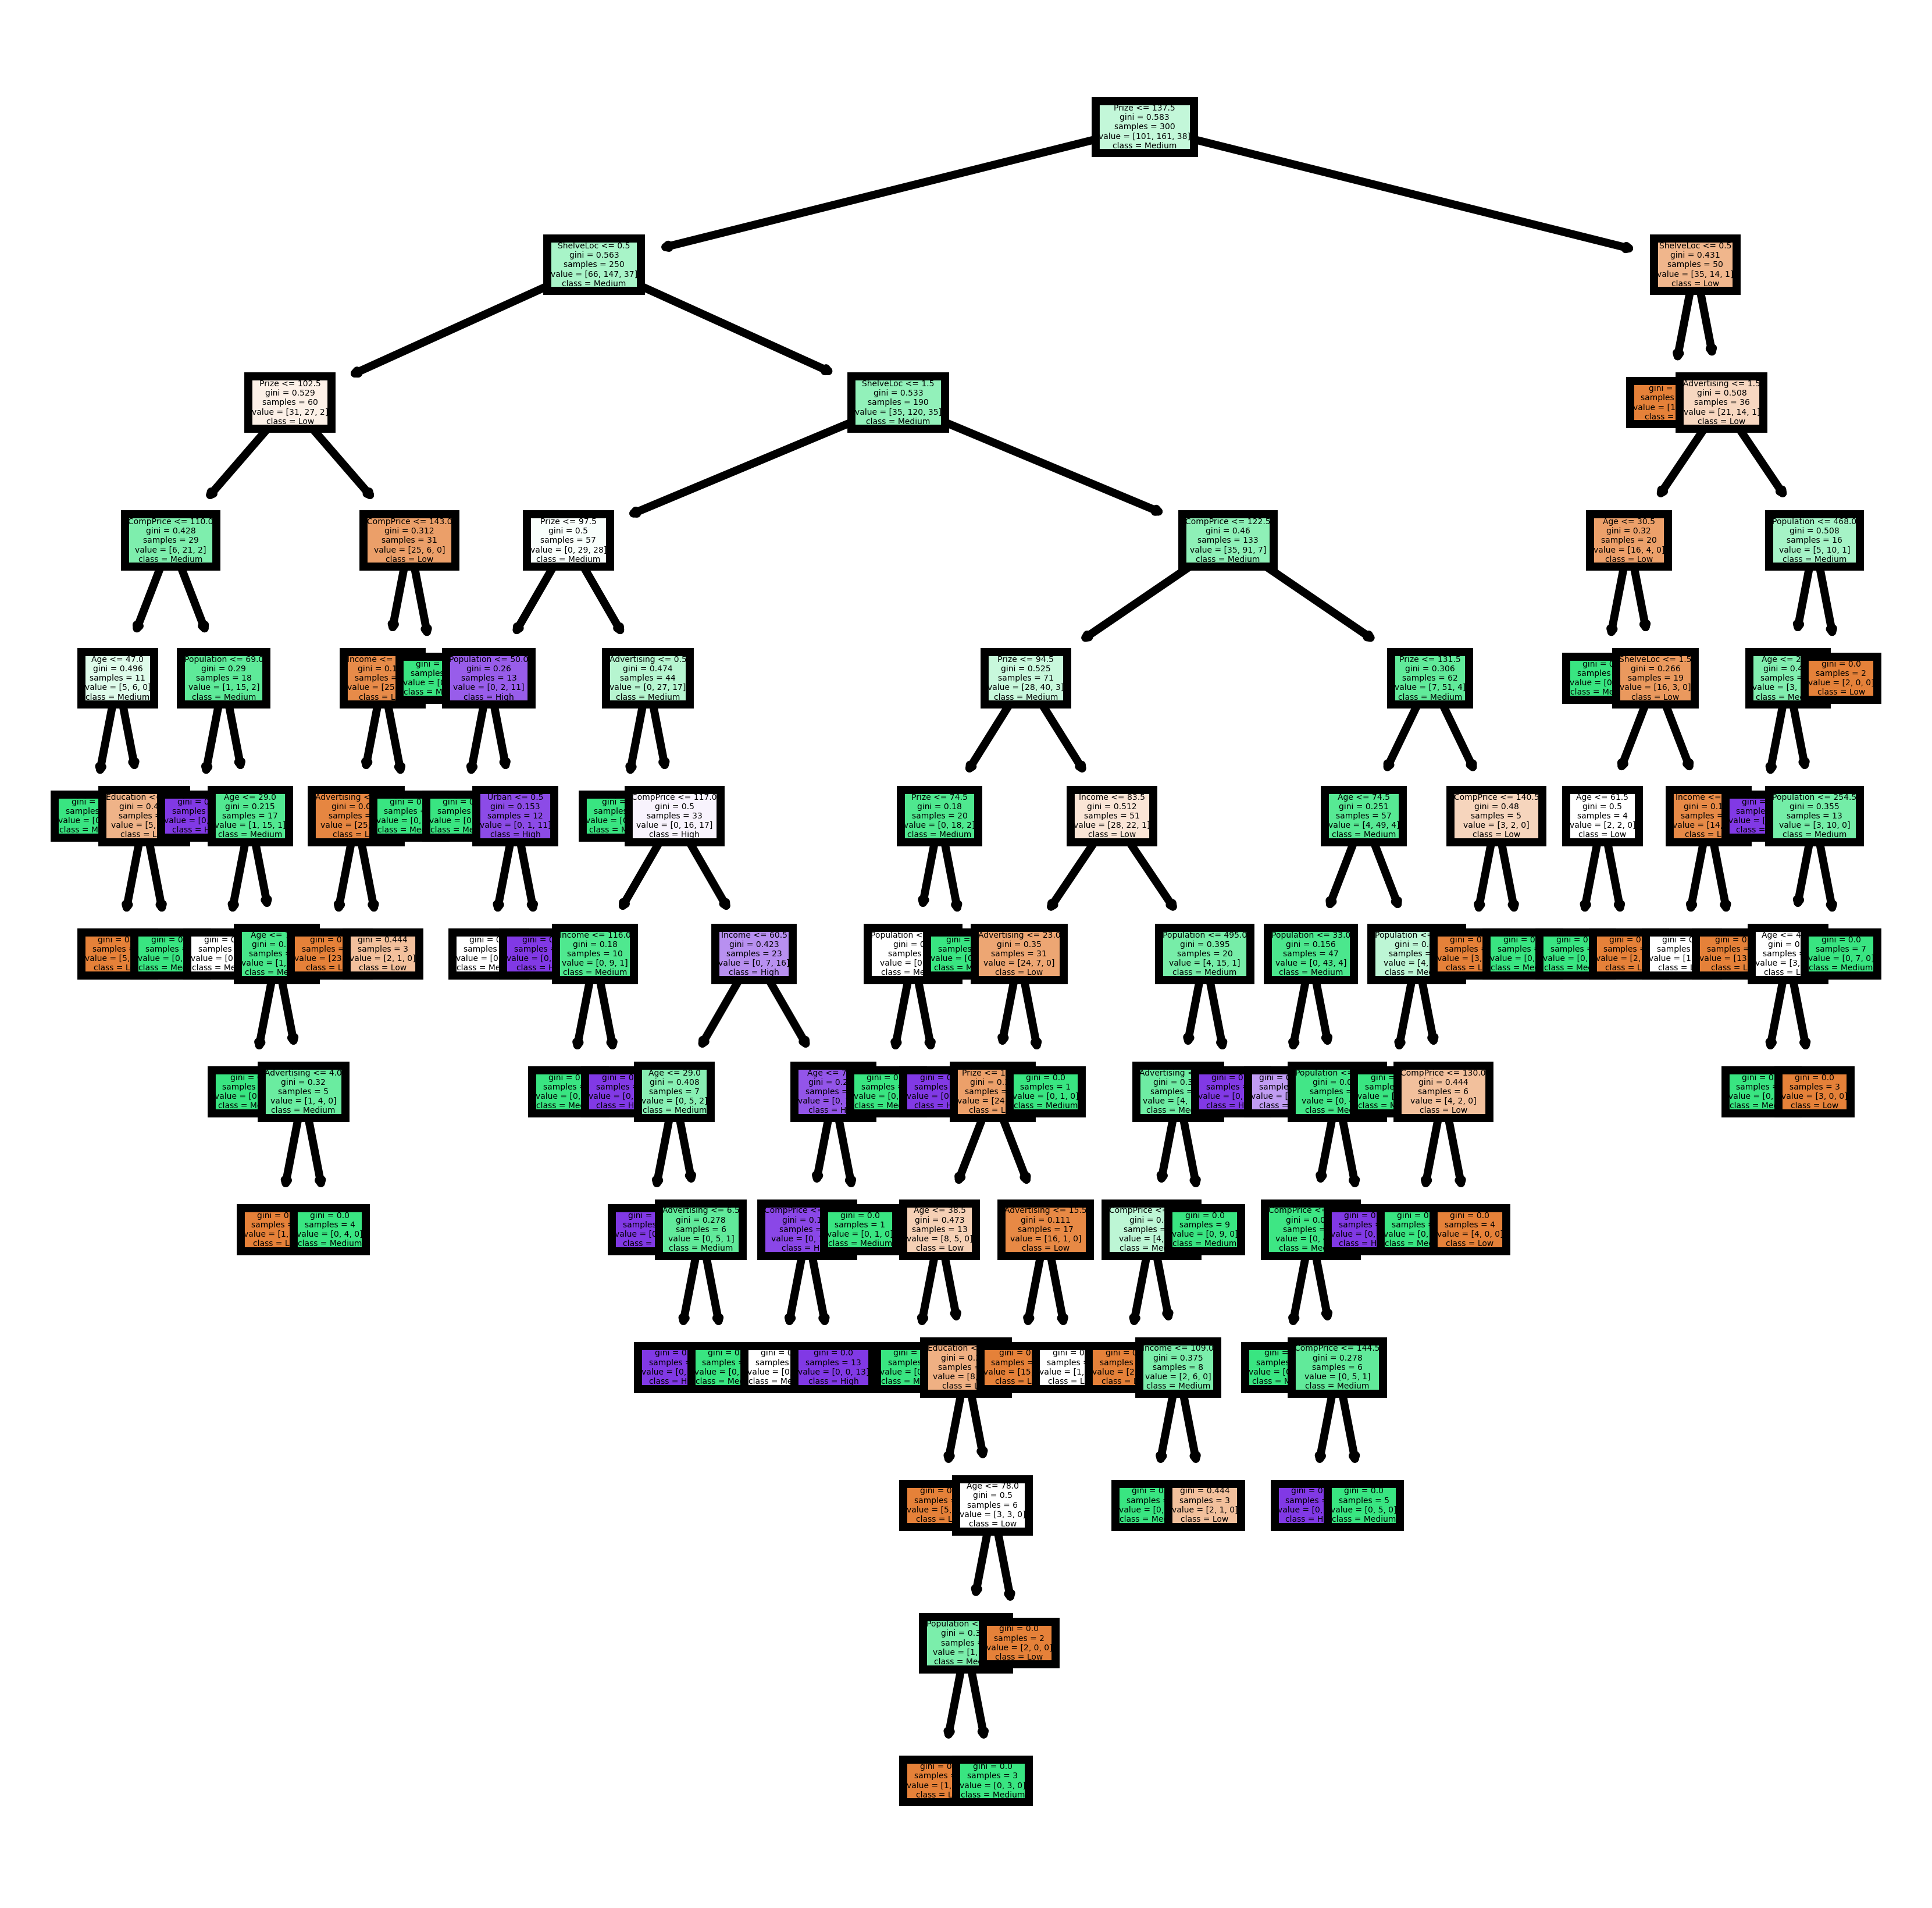

In [47]:
fe=['CompPrice','Income','Advertising','Population','Prize','ShelveLoc',
    'Age','Education','Urban','US']
ta=['Low','Medium','High']
fig,axes=plt.subplots(figsize=(4,4),dpi=1000)
tree.plot_tree(model,feature_names=fe,class_names=ta,filled= True);
plt.show()